In [ ]:
"""
Assignment 

1 Regularization.

Using the accompanying Hitters dataset (found here), we will explore regression models to predict a player's Salary from other variables. You can use any programming languages or frameworks that you wish.

1.1 Use LASSO regression to predict Salary from the other numeric predictors (you should omit the categorical predictors). 
1.1.1. Create a visualization of the coefficient trajectories
1.1.2. Comment on which are the final three predictors that remain in the model
1.1.3. Use cross-validation to find the optimal value of the regularization penalty
1.1.4. How many predictors are left in that model?

1.2 Repeat with Ridge Regression. 
1.2.1 Visualize the coefficient trajectories
1.2.2 Use cross-validation to find the optimal value of the regularization penalty

2 Short Answer. 
2.1 Explain in your own words the bias-variance tradeoff
2.2 What role does regularization play in this tradeoff? 
2.3 Make reference to your findings in number (1) to describe models of high/low bias and variance
"""

# Ze Zheng
# Problem 1

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
#from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

%matplotlib inline

Text(0.5,1,'Lasso Coefficients Trajectory')

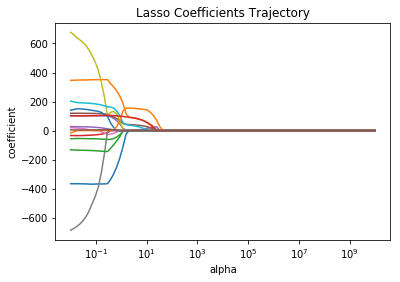

In [4]:
hitters = pd.read_csv("Hitters.csv")
# remove non-numeric columns
hitters_df =  hitters.drop(columns=['League','Division','NewLeague'])
# remove first column and NA records
hitters_df = hitters_df.dropna().drop(['Unnamed: 0'],axis=1)

x = hitters_df.drop(['Salary'],axis=1)
y = hitters_df['Salary']


alphas = 10**np.linspace(10,-2,100)*0.5

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)


# Create a visualization of the coefficient trajectories

# Lasso
lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

for i in alphas:
    lasso.set_params(alpha=i)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('coefficient')
plt.title('Lasso Coefficients Trajectory')


In [5]:
# Comment on which are the final three predictors that remain in the model
lasso = Lasso(alpha=10, max_iter=10000, normalize=True)
lasso.fit(x, y)
pd.Series(lasso.coef_, index=x.columns)

print(pd.Series(lasso.coef_, index=x.columns))
print('')
print("Arrcording to the output above, we can see the final three predictors that remain in the model are 'Hits', 'CRuns'.'CRBI'")


AtBat      0.000000
Hits       0.329475
HmRun      0.000000
Runs       0.000000
RBI        0.000000
Walks      0.000000
Years      0.000000
CAtBat     0.000000
CHits      0.000000
CHmRun     0.000000
CRuns      0.076322
CRBI       0.204475
CWalks     0.000000
PutOuts    0.000000
Assists    0.000000
Errors     0.000000
dtype: float64

Arrcording to the output above, we can see the final three predictors that remain in the model are 'Hits', 'CRuns'.'CRBI'


In [6]:
# Use cross-validation to find the optimal value of the regularization penalty
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)
lasso.set_params(alpha=lassocv.alpha_)
print('The optimal value of the regularization penalty is',lassocv.alpha_)

The optimal value of the regularization penalty is 0.07425688482302709


In [7]:
#How many predictors are left in that model?
lasso.fit(x, y)

pd.Series(lasso.coef_, index=x.columns)
print(pd.Series(lasso.coef_, index=x.columns))
print('')
print('There are 14 predictors are left in the model')

AtBat     -2.057481
Hits       6.923050
HmRun      0.000000
Runs      -0.487891
RBI        0.464623
Walks      5.421975
Years     -6.623436
CAtBat    -0.075137
CHits      0.000000
CHmRun     0.209829
CRuns      1.158378
CRBI       0.551134
CWalks    -0.671291
PutOuts    0.291914
Assists    0.294058
Errors    -2.394725
dtype: float64

There are 14 predictors are left in the model


# Problem 2

Text(0.5,1,'Ridge Coefficients Trajectory')

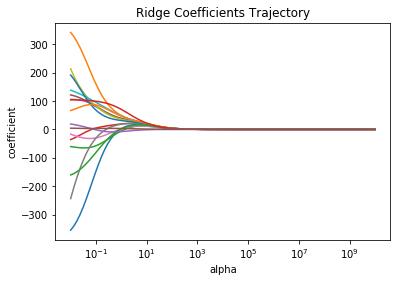

In [21]:
# Visualize the coefficient trajectories
# Ridge
ridge = Ridge(normalize = True)
ridge_coefs = []

alphas = 10**np.linspace(10,-2,100)*0.5

for j in alphas:
    ridge.set_params(alpha=j)
    ridge.fit(scale(X_train), y_train)
    ridge_coefs.append(ridge.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, ridge_coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('coefficient')
plt.title('Ridge Coefficients Trajectory')

In [34]:
# Use cross-validation to find the optimal value of the regularization penalty
ridgecv = RidgeCV(alphas = alphas, scoring='neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
ridge.set_params(alpha=ridgecv.alpha_)
print('The optimal value of the regularization penalty is',ridgecv.alpha_)

The optimal value of the regularization penalty is 0.008737642000038414


# Short Answer

Question: Explain in your own words the bias-variance tradeoff

In my opinion, bias and variance are used to measure the accuracy and precision of a model, but they indicate two different aspects of the measurement. The best model would have low bias and low variance after trained the training data, but we cannot promise to keep both bias and variance low in our real world. Therefore, the bias-variance tradeoff could sacifice one or both of them a little bit higher which could keep both of them relatively low, rather than making one is high and another one is low. 


Question: What role does regularization play in this tradeoff? 

Sometimes, we encounter the overfitting issue for the trained model, we could use the regularization in this tradeoff to prevent overfitting because the regularization would increase bias and decrease variance. 

Question: Make reference to your findings in number (1) to describe models of high/low bias and variance

For both Lasso and Ridge models, we got small value alphas which are 0.07425688482302709 and 0.008737642000038414 respectively.When alpha = 0, the penalty term has no effect, and ridge regression will produce the least squares estimates. Hence, both models have low bias but high variance. 